<a href="https://colab.research.google.com/github/izazfarras/myskillfinpro/blob/main/Izaz_Farras_Jawaban_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## `Pastikan klik 'File > Save a copy in Drive' sebelum memulai pengerjaan`

In [ ]:
#Mengimpor library yang dibutuhkan
import pandas as pd # Kita butuh ini pertama kali buat upload file as a DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay
print("The library has completely imported!")

The library has completely imported!


#Dataset

Data yang digunakan adalah data yang berasal dari Tokopedia (***bukan data sesungguhnya***). Mengenai penjelasan dataset adalah sebagai berikut:

|variable                       |class     |description |
|:------------------------------|:---------|:-----------|
**order_detail:**
id 			|object| angka unik dari order / id_order
customer_id 		|object|angka unik dari pelanggan
order_date 		|object| tanggal saat dilakukan transaksi
sku_id 			|object| angka unik dari produk (sku adalah stock keeping unit)
price			|int64| harga yang tertera pada tagging harga
qty_ordered 		|int64| jumlah barang yang dibeli oleh pelanggan
before_discount	|float64| nilai harga total dari produk (price * qty_ordered)
discount_amount	|float64| nilai diskon product total
after_discount		|float64| nilai harga total produk ketika sudah dikurangi dengan diskon
is_gross 		|int64| menunjukkan pelanggan belum membayar pesanan
is_valid		|int64| menunjukkan pelanggan sudah melakukan pembayaran
is_net			|int64| menunjukkan transaksi sudah selesai
payment_id 		|int64| angka unik dari metode pembayaran
||
**sku_detail:**
id |object| angka unik dari produk (dapat digunakan untuk key saat join)
sku_name 		|object| nama dari produk
base_price		|float64| harga barang yang tertera pada tagging harga / price
cogs 			|int64| cost of goods sold / total biaya untuk menjual 1 produk
category		|object| kategori produk
||
**customer_detail:**
id 			|object| angka unik dari pelanggan
registered_date	|object| tanggal pelanggan mulai mendaftarkan diri sebagai anggota
||
**payment_detail:**
id			|int64| angka unik dari metode pembayaran
payment_method	|object| metode pembayaran yang digunakan


In [ ]:
#Sumber data yang digunakan
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)
print("Dataset has successfully imported!")

Dataset has successfully imported!


In [ ]:
#Mengampilkan 5 baris pertama
df_od.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4


In [ ]:
#Mengampilkan 5 baris pertama
df_pd.head()

,id,payment_method
0,1,cod
1,2,jazzvoucher
2,3,customercredit
3,4,Payaxis
4,5,jazzwallet


In [ ]:
#Mengampilkan 5 baris pertama
df_cd.head()

,id,registered_date
0,C996508L,2021-07-10
1,C180415L,2021-07-18
2,C535451L,2021-07-23
3,C177843L,2021-07-12
4,C951682L,2021-07-27


In [ ]:
#Mengampilkan 5 baris pertama
df_sd.head()

,id,sku_name,base_price,cogs,category
0,P798444,AT-FSM-35,57631.70,46052,Kids & Baby
1,P938347,AYS_Haier-18HNF,3931789.26,3499256,Appliances
2,P826364,Atalian _DV206A-Brown-41,324597.00,243426,Men Fashion
3,P467533,Darul_Sakoon_Food_Bundle,2870.42,2378,Superstore
4,P229955,HP_15AY-15-Ay072NIA-ci3,2265625.00,1631250,Computing


In [ ]:
#Menjalankan SQL di Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')

3998

In [ ]:
#Query SQL untuk menggabungkan data
df = pd.read_sql("""
SELECT
    od.*,
    pd.payment_method,
    sd.sku_name,
    sd.base_price,
    sd.cogs,
    sd.category,
    cd.registered_date
FROM order_detail od
LEFT JOIN payment_detail pd
  ON (pd.id = od.payment_id)
LEFT JOIN sku_detail sd
  ON (sd.id = od.sku_id)
LEFT JOIN customer_detail cd
  ON (cd.id = od.customer_id)
""", conn)

In [ ]:
#Mengampilkan data hasil table join
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000.0,2610000.00,2610000.00,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100.0,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710.0,2464927.50,7394782.50,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942.0,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000.0,2065344.62,5416655.38,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000.0,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680.0,1455440.40,2138239.60,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680.0,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220.0,1059172.80,3354047.20,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220.0,3177472,Appliances,2021-07-05


In [ ]:
#Menampikan tipe data tiap kolom
df.dtypes

id                  object
customer_id         object
order_date          object
sku_id              object
price                int64
qty_ordered          int64
before_discount    float64
discount_amount    float64
after_discount     float64
is_gross             int64
is_valid             int64
is_net               int64
payment_id           int64
payment_method      object
sku_name            object
base_price         float64
cogs                 int64
category            object
registered_date     object
dtype: object

In [ ]:
#Mengubah tipe data agar mudah dilakukan pengolahan data
df = df.astype({"before_discount":'int', "discount_amount":'int',
                "after_discount":'int',"base_price":'int', "payment_id" :'object'})
df.dtypes

id                 object
customer_id        object
order_date         object
sku_id             object
price               int64
qty_ordered         int64
before_discount     int64
discount_amount     int64
after_discount      int64
is_gross            int64
is_valid            int64
is_net              int64
payment_id         object
payment_method     object
sku_name           object
base_price          int64
cogs                int64
category           object
registered_date    object
dtype: object

In [ ]:
#Mengubah tipe kolom Date dari object menjadi datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                 object
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

## `No 1`
**Dear Data Analyst**,
<br></br>
Akhir tahun ini, perusahaan akan memberikan hadiah bagi pelanggan yang memenangkan kompetisi **Festival Akhir Tahun**. Tim Marketing membutuhkan bantuan untuk menentukan perkiraan hadiah yang akan diberikan pada pemenang kompetisi nantinya. Hadiah tersebut akan diambil dari **TOP 5 Produk** dari Kategori **Mobiles & Tablets** selama tahun 2022, dengan jumlah kuantitas penjualan (valid = 1) paling tinggi.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data dengan Category = Mobiles & Tablets
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name
5. Gunakan sort_values untuk mengurutkan data
6. Gunakan head untuk menampilkan top 5 produk


```



</details>

## `Jawaban No 1`

In [ ]:
# Melihat isi tabel dan nama kolom yang tersedia
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05


In [ ]:
# Menambahkan kolom baru 'year' pada tabel
df['year'] = df['order_date'].dt.year

# Memberikan filter untuk is_valid = 1, category = Mobiles & Tablets, dan year = 2022
df_filter = df.query('(is_valid == 1) & (category == "Mobiles & Tablets") & (year == 2022)')
df_new = pd.DataFrame(df_filter.groupby(by=['sku_name'])['qty_ordered'].sum().sort_values(ascending=False)\
                      .reset_index(name='Qty Ordered')).head()

# Mengembalikan hasil filtering dan memberikan nama indexnya berdasarkan 'sku_name'
df_new.set_index('sku_name')

,Qty Ordered
sku_name,
IDROID_BALRX7-Gold,1000
IDROID_BALRX7-Jet black,31
Infinix Hot 4-Gold,15
samsung_Grand Prime Plus-Black,11
infinix_Zero 4-Grey,10


## `No 2`
**Dear Data Analyst**,
<br></br>
Menindaklanjuti meeting gabungan Tim Werehouse dan Tim Marketing, kami menemukan bahwa ketersediaan stock produk dengan Kategori Others pada akhir 2022 kemarin masih banyak.
1. Kami mohon bantuan untuk melakukan pengecekan data penjualan kategori tersebut dengan tahun 2021 secara kuantitas penjualan. Dugaan sementara kami, telah terjadi penurunan kuantitas penjualan pada 2022 dibandingkan 2021. (Mohon juga menampilkan data ke-15 kategori)
<br></br>
2. Apabila memang terjadi penurunan kuantitas penjualan pada kategori Others, kami mohon bantuan untuk menyediakan data TOP 20 nama produk yang mengalami penurunan paling tinggi pada 2022 jika dibanding dengan 2021. Hal ini kami gunakan sebagai bahan diskusi pada meeting selanjutnya.  

Mohon bantuan untuk mengirimkan data tersebut paling lambat 4 hari dari hari ini. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Werehouse**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan valid = 1
2. Memfilter data pada transaksi selama 2021
3. Memfilter data pada transaksi selama 2022
4. Gunakan groupby berdasarkan sku_name masing-masing tahun
5. Menggabungkan kedua data dengan merge
6. Lakukan pengurangan kolom qty 2022 dengan qty 2021


```



</details>

## `Jawaban No 2.1`

In [ ]:
# Mencari tahu info tabel dan nama kolomnya
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021


In [ ]:
# Mengaplikasikan filter sesuai dengan kebutuhan
df_filter1 = df.query('(is_valid == 1) & (year == 2021)')
df_new_2021 = pd.DataFrame(df_filter1.groupby(by=['category'])['qty_ordered'].sum().sort_values(ascending=False).reset_index(name='qty_2021'))

df_filter2 = df.query('(is_valid == 1) & (year == 2022)')
df_new_2022 = pd.DataFrame(df_filter2.groupby(by=['category'])['qty_ordered'].sum().sort_values(ascending=False).reset_index(name='qty_2022'))

#Menggabungkan 2 dataframe
df_gabungan = df_new_2021.merge(df_new_2022, left_on='category', right_on='category')

#Mencari tau perbandingan qty 2022 terhadap qty 2021
df_gabungan['qty_growth'] = df_gabungan['qty_2022'] - df_gabungan['qty_2021']
df_gabungan.sort_values(['qty_growth'], ascending=False).set_index('category')

,qty_2021,qty_2022,qty_growth
category,,,
Mobiles & Tablets,107,1154,1047
Women Fashion,140,489,349
Superstore,327,536,209
Entertainment,77,150,73
Home & Living,193,250,57
Kids & Baby,170,227,57
School & Education,184,237,53
Computing,109,153,44
Health & Sports,173,200,27


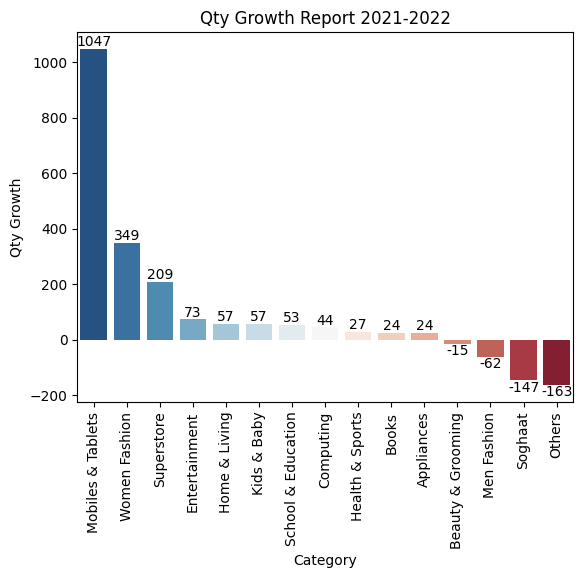

In [ ]:
# Membuat grafik visualisasi
my_colours = sns.color_palette("RdBu_r", 15)

df_gabungan_sort = df_gabungan.sort_values(by=['qty_growth'],ascending=[False])
ax = sns.barplot(data=df_gabungan_sort, x='category', y='qty_growth', palette=my_colours)
ax.set(
    xlabel='Category',
    ylabel='Qty Growth',
    title='Qty Growth Report 2021-2022'
)
for i in ax.containers:
  ax.bar_label(i)

plt.xticks(rotation=90)
plt.show()

## `Jawaban No 2.2`

In [ ]:
# Melakukan filtering untuk menghitung qty ordered per produk tahun 2021
df_others1 = df.query('(is_valid == 1) & (year == 2021) & (category == "Others")')
df_others_2021 = pd.DataFrame(df_others1.groupby(by=['sku_name'])['qty_ordered'].sum().sort_values(ascending=False).reset_index(name='qty_2021'))

# Melakukan filtering untuk menghitung qty ordered per produk tahun 2022
df_others2 = df.query('(is_valid == 1) & (year == 2022) & (category == "Others")')
df_others_2022 = pd.DataFrame(df_others2.groupby(by=['sku_name'])['qty_ordered'].sum().sort_values(ascending=False).reset_index(name='qty_2022'))

#Menggabungkan 2 dataframe
df_gabungan2 = df_others_2021.merge(df_others_2022, how='outer').fillna(0)

#Mencari tau perbandingan qty 2022 terhadap qty 2021
df_gabungan2['qty_growth'] = df_gabungan2['qty_2022'] - df_gabungan2['qty_2021']
df_gabungan2[['qty_2021', 'qty_2022', 'qty_growth']] = df_gabungan2[['qty_2021', 'qty_2022', 'qty_growth']].astype(int)
df_gabungan2.sort_values(['qty_growth'], ascending=True).set_index('sku_name').head(20)

,qty_2021,qty_2022,qty_growth
sku_name,,,
RB_Dettol Germ Busting Kit-bf,200,45,-155
Dawlance_MD 10 + DWB 600,23,0,-23
Telemall_MM-DR-HB-L,23,2,-21
iu_Tickets General Enclosure-Islamabad,20,0,-20
RS_Rehmat-e-Shereen Mix Mithai,13,0,-13
kansai_NeverWet,10,1,-9
sindbad_Sindbad Gift Card-3,7,0,-7
emart_00-1,7,1,-6
Vouch 365 2016,5,0,-5


## `No 3`
**Dear Data Analyst**,
<br></br>
Terkait ulang tahun perusahaan pada 2 bulan mendatang, Tim Digital Marketing akan memberikan informasi promo bagi pelanggan pada akhir bulan ini. Kriteria pelanggan yang akan kami butuhkan adalah mereka yang sudah melakukan check-out namun belum melakukan pembayaran (is_gross = 1) selama tahun 2022. Data yang kami butuhkan adalah ID Customer dan Registered Date.

Mohon bantuan, untuk mengirimkan data tersebut sebelum akhir bulan ini ke Tim Digital Marketing. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Digital Marketing**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Memfilter data dengan gross = 1
2. Memfilter data dengan valid = 0
3. Memfilter data dengan net = 0
4. Memfilter data pada transaksi selama 2022


```



</details>

## `Jawaban No 3`

In [ ]:
df_filter3 = df.query('(is_gross == 1) & (is_valid == 0) & (is_net == 0) & (year == 2022)').sort_values(by='registered_date', ascending=True).reset_index()
#Reset index hasil kerjaan nomor 2, menghapus index sku_name
df_gross = pd.DataFrame(df_filter3[["customer_id", "registered_date"]])
df_gross.set_index("customer_id")

,registered_date
customer_id,
C349980L,2021-07-02
C849967L,2021-07-02
C378684L,2021-07-03
C831683L,2021-07-03
C378684L,2021-07-03
...,...
C877563L,2022-08-24
C788348L,2022-08-25
C741725L,2022-08-25


In [ ]:
# Mencari jumlah orang yang belom melakukan pembayaran
df_gross_person = pd.DataFrame(df_gross.groupby(by=['customer_id'])['customer_id'].value_counts()\
                               .sort_values(ascending=False)).head(20)
print(df_gross_person['customer_id'].sum())

# Mencari jumlah pesanan yang belom dibayar
df_gross_order = df_gross[['customer_id', 'registered_date']].drop_duplicates().shape[0]
df_gross_order

113


820

In [ ]:
# Mencari jumlah orang yang belom melakukan pembayaran
df_gross_person = pd.DataFrame(df_gross.groupby(by=['customer_id'])['customer_id'].value_counts().sort_values(ascending=False)).head(20)
print(df_gross_person['customer_id'].sum())

# Mencari jumlah pesanan yang belom dibayar
#df_gross_person = pd.DataFrame(df_gross.groupby(by=['registered_date'])['customer_id'].count().sort_values(ascending=False)).head(20)
#print(df_gross_person['customer_id'].sum())

# Mencari jumlah pesanan yang belom dibayar
df_gross_order = df_gross[['customer_id', 'registered_date']]
df_gross_order.head(100)

In [ ]:
# Kode untuk mendownload file
from google.colab import files
df_gross.to_csv('audience_list.csv', encoding = 'utf-8-sig',index=False)
files.download('audience_list.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## `No 4`
**Dear Data Analyst**,
<br></br>
Pada bulan October hingga Desember 2022, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (before_discount). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.
2. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) keseluruhan 3 bulan tersebut.

Mohon bantuan untuk mengirimkan data tersebut paling lambat minggu depan. Atas bantuan yang diberikan, kami mengucapkan terima kasih.
<br></br>
Regards

**Tim Campaign**

<details><summary>Klik di sini untuk tips</summary>


```python
1. Buatlah kolom baru untuk day, month, dan month number
2. Memfilter data dengan valid = 1
3. Memfilter data dengan day termasuk 'Saturday', 'Sunday' dengan menggunakan fungsi isin dan simpan dalam variable 'weekends'
4. Memfilter data dengan day termasuk 'Monday','Tuesday','Wednesday','Thusday','Friday' dengan menggunakan fungsi isin dan simpan dengan variabel 'weekday'
5. Memfilter data pada transaksi selama 2022 bulan Oktober sampai dengan Desember
6. Gunakan groupby berdasarkan pada masing-masing variabel
7. Menggabungkan kedua data dengan merge
8. Tampilkan pada grafik batang untuk melihat perbedaananya


```



</details>

## `Jawaban No 4.1`

In [ ]:
# Bikin kolom hari, bulan, nomor bulan, dan tahun
df['day'] = df['order_date'].dt.day_name()
df['month'] = df['order_date'].dt.month_name()
df['month_num'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_num
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021,Sunday,November,11


In [ ]:
# Filter pakai metode isin
weekend = df["day"].isin(["Saturday", "Sunday"])
weekday = df["day"].isin(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"])
df_q4 = df[(df['month'].isin(["October", "November", "December"]) & (df['year'] == 2022))]
df_is_valid = df[(df['is_valid'] == 1)]
df_is_valid

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_num
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021,Friday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021,Sunday,November,11
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,...,cod,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,2022,Thursday,December,12
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,...,customercredit,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,2022,Thursday,December,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5877,ODR6864259419h,C714630L,2022-07-25,P194155,0,3,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-06-24,2022,Monday,July,7
5878,ODR8376183747r,C300950L,2022-07-28,P194155,0,1,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2021-09-05,2022,Thursday,July,7
5879,ODR4312238651y,C295679L,2022-07-29,P194155,0,2,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-07-23,2022,Friday,July,7
5880,ODR3930118778w,C368658L,2022-09-06,P194155,0,1,0,0,0,1,...,cod,Bahr-e-Shifa,0,0,Books,2022-05-19,2022,Tuesday,September,9


In [ ]:
# Filter pakai df.query
df_weekends = df.query('(is_valid == 1) & ((day == "Saturday") | (day == "Sunday")) & ((month == "October") | (month == "November") | (month=="December")) & (year == 2022)')
avg_df_weekends = pd.DataFrame(df_weekends.groupby(by=['order_date','day', 'month'])['before_discount'].sum().round(2))
#avg_df_weekends

df_weekdays = df.query('(is_valid == 1) & ((day == "Monday") | (day == "Tuesday") | (day == "Wednesday") | (day == "Thursday") | (day == "Friday")) & ((month == "October") | (month == "November") | (month=="December")) & (year == 2022)')
avg_df_weekdays = pd.DataFrame(df_weekdays.groupby(by=['order_date','day', 'month'])['before_discount'].sum().round(2))
#avg_df_weekdays

In [ ]:
# Mencari rata-rata harian penjualan weekends (Sabtu dan Minggu) per bulan tersebut.
avg_weekends = pd.DataFrame(df_weekends.groupby(by=['month'])['before_discount'].mean().reset_index(name='avg_weekend').round())
#avg_weekends.set_index('month_num').sort_values(by=['month_num'], ascending=True))

# Mencari rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut.
avg_weekdays = pd.DataFrame(df_weekdays.groupby(by=['month'])['before_discount'].mean().reset_index(name='avg_weekday').round())
#avg_weekdays.set_index('month_num').sort_values(by=['month_num'], ascending=True)

#Menggabungkan 2 dataframe
df_gabungan3 = avg_weekends.merge(avg_weekdays, how='outer').fillna(0)

#Mencari tau perbandingan Avg Weekends dan Avg Weekdays
df_gabungan3[['month', 'avg_weekend','avg_weekday']].sort_values(['month'], ascending=False).set_index('month')

,avg_weekend,avg_weekday
month,,
October,634260.0,874690.0
November,607794.0,641862.0
December,410599.0,813574.0


In [ ]:
# Mencari rata-rata harian penjualan weekends (Sabtu dan Minggu) per bulan tersebut.
sum_weekends = pd.DataFrame(df_weekends.groupby(by=['order_date','day','month'])['before_discount'].sum())
avg_weekends = sum_weekends.groupby(by=['month'])['before_discount'].mean().reset_index(name='avg_weekend').round(2)

# Mencari rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut.
sum_weekdays = pd.DataFrame(df_weekdays.groupby(by=['order_date','day','month'])['before_discount'].sum())
avg_weekdays = sum_weekdays.groupby(by=['month'])['before_discount'].mean().reset_index(name='avg_weekday').round(2)

#Menggabungkan 2 dataframe
df_gabungan3 = avg_weekends.merge(avg_weekdays, how='outer').fillna(0)

#Mencari tau perbandingan Avg Weekends dan Avg Weekdays
df_gabungan3[['month', 'avg_weekend','avg_weekday']].sort_values(['month'], ascending=False).set_index('month')
#avg_weekends.set_index('month').sort_values(by=['month'], ascending=False)

,avg_weekend,avg_weekday
month,,
October,5708340.67,7872212.4
November,5774045.00,6204666.0
December,4105994.00,8542530.0


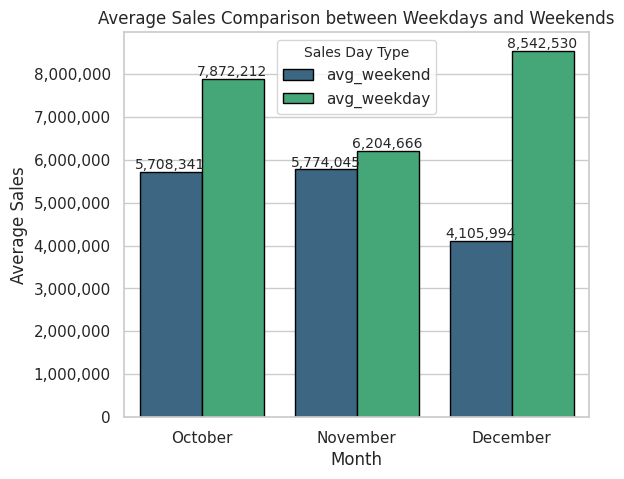

In [ ]:
# Membuat grafik visualisasi
df_melt = pd.melt(df_gabungan3, id_vars='month', var_name='Type', value_name='Average Sales')\
          .sort_values(by=['month'], ascending=[False])
plt.figure(figsize=(6, 5))

ax = sns.barplot(data=df_melt, x='month', y='Average Sales', hue='Type', palette='viridis', edgecolor='black')
ax.set(
   xlabel='Month',
   ylabel='Average Sales',
   title='Average Sales Comparison between Weekdays and Weekends'
)

# Mengatur format angka di sumbu y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

# Menambahkan label angka pada bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, xytext=(0, 5), textcoords='offset points')

plt.xticks(rotation=0)
plt.legend(title='Sales Day Type', loc='upper center').get_title().set_fontsize('small')
plt.show()

## `Jawaban No 4.2`

In [ ]:
# Mencari rata-rata harian penjualan weekends (Sabtu dan Minggu) pada Q4 secara keseluruhan.
weekdays_2 = avg_df_weekdays['before_discount'].mean().round(2)
weekends_2 = avg_df_weekends['before_discount'].mean().round(2)
diff = weekends_2 - weekdays_2
diff_perc = round(((diff) / weekends_2) * 100, 2)

trx_3_months = {
    'Period' : 'Average Sales Weekend vs Weekdays for 3 Months',\
    'Avg_Weekday' : weekdays_2,\
    'Avg_Weekend' : weekends_2,\
    'Diff (Value)' : diff,\
    'Diff (%)' : diff_perc
}

df_3_months = pd.DataFrame(trx_3_months, index=[0])
df_3_months.set_index('Period')

,Avg_Weekday,Avg_Weekend,Diff (Value),Diff (%)
Period,,,,
Average Sales Weekend vs Weekdays for 3 Months,7520249.29,5269300.0,-2250949.29,-42.72


In [ ]:
# Mencari rata-rata harian penjualan weekends (Sabtu dan Minggu) per bulan tersebut.
avg_weekends = pd.DataFrame(avg_df_weekends.groupby(by=['month'])['before_discount'].mean().reset_index(name='avg_weekend').round())

# Mencari rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut.
avg_weekdays = pd.DataFrame(avg_df_weekdays.groupby(by=['month'])['before_discount'].mean().reset_index(name='avg_weekday').round())

#Menggabungkan 2 dataframe
df_gabungan4 = avg_weekends.merge(avg_weekdays, left_on='month', right_on='month')

#Mencari tau perbandingan Avg Weekends dan Avg Weekdays
df_gabungan4['diff'] = df_gabungan4['avg_weekend'] - df_gabungan4['avg_weekday']
df_gabungan4['diff (%)'] = pd.Series(((df_gabungan4['avg_weekend'] - df_gabungan4['avg_weekday']) / df_gabungan4['avg_weekend'] * 100).round(2))
df_gabungan4[['month', 'avg_weekend','avg_weekday', 'diff', 'diff (%)']].sort_values(['month'], ascending=False).set_index('month')

,avg_weekend,avg_weekday,diff,diff (%)
month,,,,
October,5708341.0,7872212.0,-2163871.0,-37.91
November,5774045.0,6204666.0,-430621.0,-7.46
December,4105994.0,8542530.0,-4436536.0,-108.05
